In [1]:
# Importing Libraries
import numpy as np
import pandas as pd 
import os 
import random
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
%matplotlib inline

import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from tensorflow.keras.utils import load_img, img_to_array

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

In [2]:
train_path = r'C:\Users\iamkh\Artificial Intelligence\ImageDataset\train'
test_path = r'C:\Users\iamkh\Artificial Intelligence\ImageDataset\test'

Normal


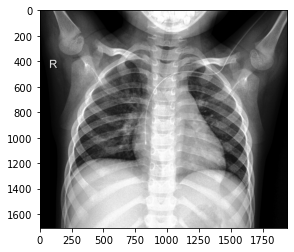

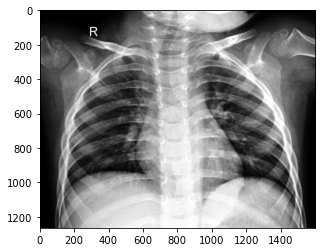

Sick


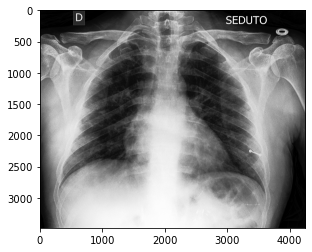

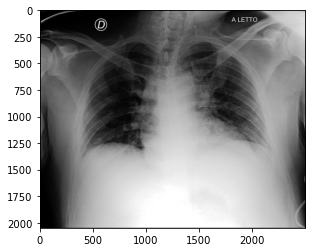

In [3]:
# covert the image to pixel
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [5]:

# data pre-processing and augmentation of training image data
train_img_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# pre-processing transformations on dataset of testing image data
test_img_datagen = ImageDataGenerator(rescale=1./255)

# generating the training Data
training_set = train_img_datagen.flow_from_directory(
        train_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


# generating the testing image data
test_set = test_img_datagen.flow_from_directory(
        test_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 42 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [6]:
# printing class labels for each image
test_set.class_indices

{'Normal': 0, 'Sick': 1}

In [7]:
# class_indices have the numeric tag for each images
train_classes=training_set.class_indices

# Storing the face and the numeric tag for future reference
result_map = {}
for ball_value,ball_name in zip(train_classes.values(),train_classes.keys()):
    result_map[ball_value] = ball_name

In [8]:
# saving the face map for future reference
import pickle
with open(R"C:\Users\iamkh\Artificial Intelligence\ImageDataset\resultsmap.pkl", 'wb') as f:
    pickle.dump(result_map, f, pickle.HIGHEST_PROTOCOL)
print("Mapping of image and id",result_map)


Mapping of image and id {0: 'Normal', 1: 'Sick'}


In [9]:
# the number of neurons for the output layer is equal to the number of images
output_neurons=len(result_map)
print('\n The number of output neurons: ', output_neurons)


 The number of output neurons:  2


## Building the CNN Model

In [10]:
# Initializing the CNN
classifier= Sequential()
# STEP--1 Convolution
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))

# STEP--2 MAX Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))
# ADDITIONAL LAYER of CONVOLUTION for better accuracy 
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# STEP--3 FLattening
classifier.add(Flatten())

# STEP--4 Fully Connected Neural Network
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(output_neurons, activation='softmax'))

# Compiling the CNN
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

## Fitting the model

In [12]:
import time
# measuring the time taken by the model to train
start_time = time.time()
# the model training
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=20,
                                        validation_data=test_set,
                                        validation_steps=len(test_set),
                                        verbose=1)

end_time = time.time()
print(" Total Time Taken: ", round((end_time-start_time)/60), 'Minutes')

C:\Users\iamkh\AppData\Local\Temp\ipykernel_5256\627481377.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/20
2/2 [==============================] - 18s 8s/step - loss: 5.8134 - accuracy: 0.5952 - val_loss: 4.8218 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 13s 5s/step - loss: 3.5057 - accuracy: 0.5000 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 14s 11s/step - loss: 0.7098 - accuracy: 0.4524 - val_loss: 0.6242 - val_accuracy: 0.6111
Epoch 4/20
2/2 [==============================] - 13s 11s/step - loss: 0.6251 - accuracy: 0.5476 - val_loss: 0.5803 - val_accuracy: 0.6667
Epoch 5/20
2/2 [==============================] - 14s 5s/step - loss: 0.6832 - accuracy: 0.4762 - val_loss: 0.6590 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 13s 11s/step - loss: 0.6396 - accuracy: 0.5714 - val_loss: 0.5354 - val_accuracy: 0.8889
Epoch 7/20
2/2 [==============================] - 14s 11s/step - loss: 0.5907 - accuracy: 0.5714 - val_loss: 0.5673 - val_accuracy: 0.5556
Epoch 8/20
2/2 [==============

In [13]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

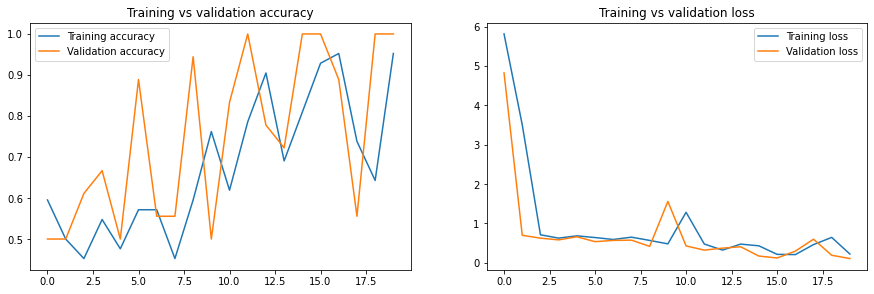

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

## Evaluate the model

In [16]:
test_loss, test_acc = classifier.evaluate(test_set, steps=len(test_set))
print('\nTest accuracy:', test_acc)

1/1 [==============================] - 3s 3s/step - loss: 0.1056 - accuracy: 1.0000

Test accuracy: 1.0


In [17]:
## Saving the model
classifier.save(r"C:\Users\iamkh\Artificial Intelligence\ImageDataset\cnn_classifier.pkl")

INFO:tensorflow:Assets written to: C:\Users\iamkh\Artificial Intelligence\ImageDataset\cnn_classifier.pkl\assets


INFO:tensorflow:Assets written to: C:\Users\iamkh\Artificial Intelligence\ImageDataset\cnn_classifier.pkl\assets


## Testing the save model on different image

In [19]:
# Making single image predictions 
_testImage = r"C:\Users\iamkh\Artificial Intelligence\ImageDataset\test\Sick\C24.jpg"
test_image = load_img(_testImage,target_size=(128, 128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image,verbose=0)

The prediction result is:  Sick


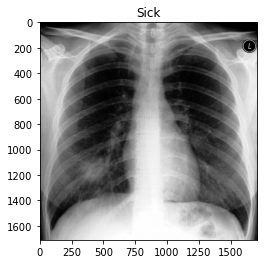

In [23]:
print('The prediction result is: ',result_map[np.argmax(result)])
img = cv2.imread(_testImage)
plt.imshow(img)
plt.title('Sick')
plt.show()

In [24]:
# Making another single image predictions 
_testImage = r"C:\Users\iamkh\Artificial Intelligence\ImageDataset\test\Normal\N22.jpg"
test_image = load_img(_testImage,target_size=(128, 128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image,verbose=0)

The prediction result is:  Normal


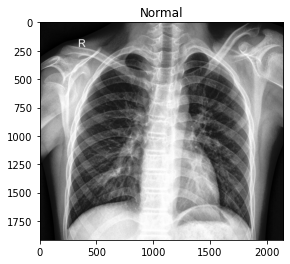

In [25]:
print('The prediction result is: ',result_map[np.argmax(result)])
img = cv2.imread(_testImage)
plt.imshow(img)
plt.title('Normal')
plt.show()